#**Prediction of Cardiac Failure using Supervised Machine Learning Techniques**

- Supervised ML
- Binary Classification
- 6 Algorithms

#Importing neccessary packages:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

#Loading dataset: 

- 938 Rows and 12 Columns (1 dependent, 11 Independent)
- 8 Categorical, 4 Discrete
- No null values



In [ ]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#User Input for Live Prediction:

In [ ]:
name = input("Enter patient name: ")
age = int(input("Age: "))
sex = input("Gender(M or F): ")
Chpt = input("Chest Pain Type: ")
Resbp = int(input("Resting Blood Pressure: "))
Chol = int(input("Cholestrol: "))
Fbp = int(input("Fasting Blood sugar(0 or 1): "))
ResECG = input("Resting ECG: ")
maxhr = int(input("Max HR: "))
exeran = input("Exercise Angina(Y or N): ")
oldpk = input("Old Peak: ")
Stslp = input("ST Slope(Up, flat or Down): ")

Enter patient name: Dheeraj
Age: 19
Gender(M or F): M
Chest Pain Type: ATA
Resting Blood Pressure: 120
Cholestrol: 165
Fasting Blood sugar(0 or 1): 0
Resting ECG: Normal
Max HR: 95
Exercise Angina(Y or N): N
Old Peak: 0.0
ST Slope(Up, flat or Down): Up


In [ ]:
prd = { 'Age': age, 'Sex': sex, 'ChestPainType': Chpt, 'RestingBP': Resbp, 'Cholesterol': Chol,
       'FastingBS': Fbp, 'RestingECG': ResECG, 'MaxHR': maxhr, 'ExerciseAngina': exeran,
       'Oldpeak': oldpk, 'ST_Slope': Stslp, 'HeartDisease': 0}
df = df.append(prd, ignore_index = True)

<ipython-input-153-001ac84de190>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(prd, ignore_index = True)


#Data PreProcessing:

- Label ecoding of Sex, ChestPainType, Resting ECG, ExerciseAngina, Fasting BS.
- Fasting BS, HeartDisease, ST Slope are ready to be used
- Normalisation of Age, Resting BP, Cholesterol and Max HR

#Label Enoding: 

In [ ]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df['FastingBS'].unique()

array([0, 1])

In [ ]:
#Label Encoding SEX, Chest Pain type, Resting ECG, ST Slope and Exercise Angina:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG']= label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope'])
df['FastingBS'] = label_encoder.fit_transform(df['FastingBS'])

#Data Normalisation: 

In [ ]:
#Normalising Age, RestingBP, Cholesterol, MaxHR:
#Age: 
for column in df.columns:
    df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())    
#RestingBP:
for column in df.columns:
    df['RestingBP'] = (df['RestingBP'] - df['RestingBP'].min()) / (df['RestingBP'].max() - df['RestingBP'].min())
#Cholesterol:
for column in df.columns:
    df['Cholesterol'] = (df['Cholesterol'] - df['Cholesterol'].min()) / (df['Cholesterol'].max() - df['Cholesterol'].min())
#MaxHR:
for column in df.columns:
    df['MaxHR'] = (df['MaxHR'] - df['MaxHR'].min()) / (df['MaxHR'].max() - df['MaxHR'].min())

In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.362069,1,1,0.70,0.479270,0,1,0.788732,0,0.0,2,0
1,0.517241,0,2,0.80,0.298507,0,1,0.676056,0,1.0,1,1
2,0.310345,1,1,0.65,0.469320,0,2,0.267606,0,0.0,2,0
3,0.500000,0,0,0.69,0.354892,0,1,0.338028,1,1.5,1,1
4,0.603448,1,2,0.75,0.323383,0,1,0.436620,0,0.0,2,0
5,0.344828,1,2,0.60,0.562189,0,1,0.774648,0,0.0,2,0
6,0.448276,0,1,0.65,0.393035,0,1,0.774648,0,0.0,2,0
7,0.603448,1,1,0.55,0.344942,0,1,0.577465,0,0.0,2,0
8,0.310345,1,0,0.70,0.343284,0,1,0.492958,1,1.5,1,1
9,0.500000,0,1,0.60,0.470978,0,1,0.422535,0,0.0,2,0


#Splitting the dataset: 

In [ ]:
x = df.iloc[:,0:11]
y = df.iloc[:,11]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

#1. KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train, y_train)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y1pred = knn1.predict(x_test)
y3pred = knn3.predict(x_test)
y5pred = knn5.predict(x_test)

In [ ]:
print("Accuracy with k=1: ", accuracy_score(y_test, y1pred)*100)

Accuracy with k=1:  82.97101449275362


In [ ]:
print("Accuracy with k=3: ", accuracy_score(y_test, y3pred)*100)

Accuracy with k=3:  84.78260869565217


In [ ]:
print("Accuracy for KNN(k=5): ", accuracy_score(y_test, y5pred)*100)

Accuracy for KNN(k=5):  84.42028985507247


In [ ]:
print("KNN (n = 3): ")
print("Recall of KNN: ", recall_score(y_test, y3pred))
print("Precision Score of KNN: ", precision_score(y_test, y3pred))
print("F1 Score of KNN: ", f1_score(y_test, y3pred))

KNN (n = 3): 
Recall of KNN:  0.8987341772151899
Precision Score of KNN:  0.8452380952380952
F1 Score of KNN:  0.8711656441717791


In [ ]:
print("KNN (n = 5): ")
print("Recall of KNN: ", recall_score(y_test, y5pred))
print("Precision Score of KNN: ", precision_score(y_test, y5pred))
print("F1 Score of KNN: ", f1_score(y_test, y5pred))

KNN (n = 5): 
Recall of KNN:  0.879746835443038
Precision Score of KNN:  0.852760736196319
F1 Score of KNN:  0.8660436137071651


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y3pred)
print('ROC AUC Score for KNN: ', roc_auc_score(y_test, y3pred))

ROC AUC Score for KNN:  0.8391975970821712


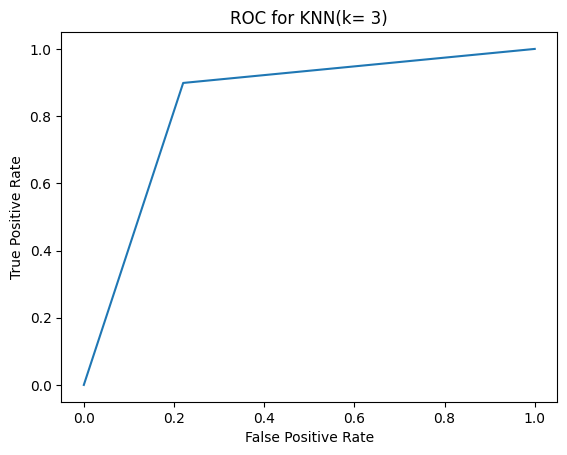

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for KNN(k= 3)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

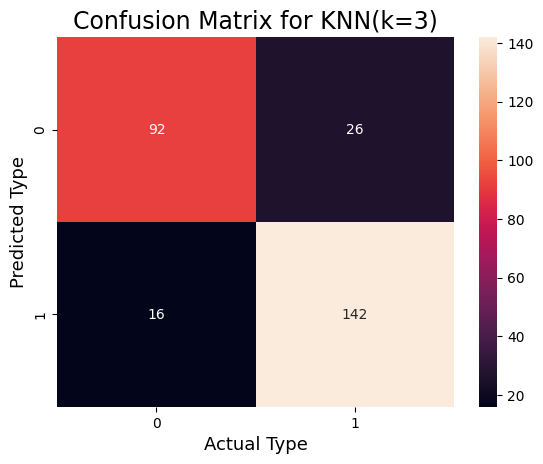

In [ ]:
cm = confusion_matrix(y_test,y3pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for KNN(k=3)',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for KNN:\n", classification_report(y_test, y5pred))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       118
           1       0.85      0.88      0.87       158

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



------------------------------------------------------------------------

#2. Desicion Tree Classifier: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(x_test)

In [ ]:
print("Accuracy for Decison Tree:", accuracy_score(y_test, y_pred)*100)
print("Recall of Decision Tree: ", recall_score(y_test, y_pred))
print("Precision Score of Decision Tree: ", precision_score(y_test, y_pred))
print("F1 Score of Decision Tree: ", f1_score(y_test, y_pred))

Accuracy for Decison Tree: 76.44927536231883
Recall of Decision Tree:  0.7215189873417721
Precision Score of Decision Tree:  0.8444444444444444
F1 Score of Decision Tree:  0.7781569965870306


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC AUC Score for Decision Tree: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for Decision Tree:  0.7717764428234284


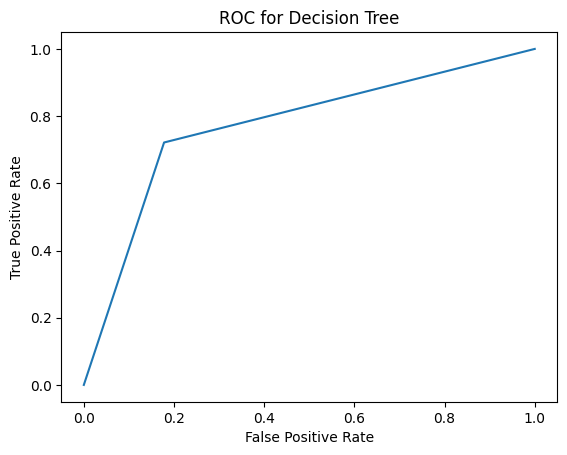

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for Decision Tree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

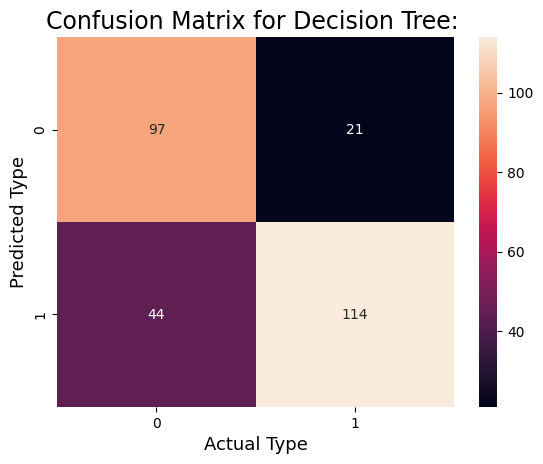

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for Decision Tree: ',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       118
           1       0.84      0.72      0.78       158

    accuracy                           0.76       276
   macro avg       0.77      0.77      0.76       276
weighted avg       0.78      0.76      0.77       276



#3. Support Vector Machine:

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
print("Accuracy for SVM:", accuracy_score(y_test, y_pred)*100)
print("Recall of SVM: ", recall_score(y_test, y_pred))
print("Precision Score of SVM: ", precision_score(y_test, y_pred))
print("F1 Score of SVM: ", f1_score(y_test, y_pred))

Accuracy for SVM: 84.78260869565217
Recall of SVM:  0.8607594936708861
Precision Score of SVM:  0.8717948717948718
F1 Score of SVM:  0.8662420382165605


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC AUC Score for SVM: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for SVM:  0.8456339841235787


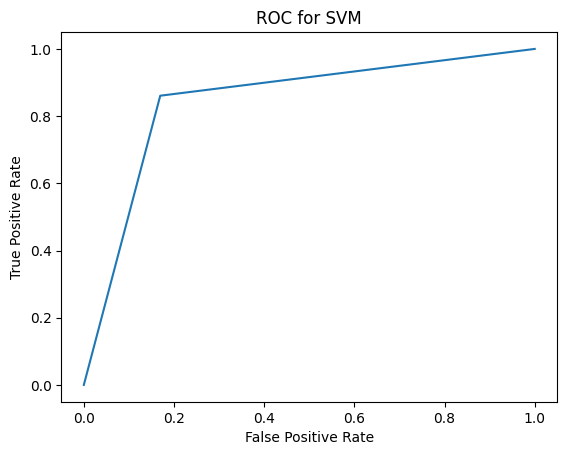

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

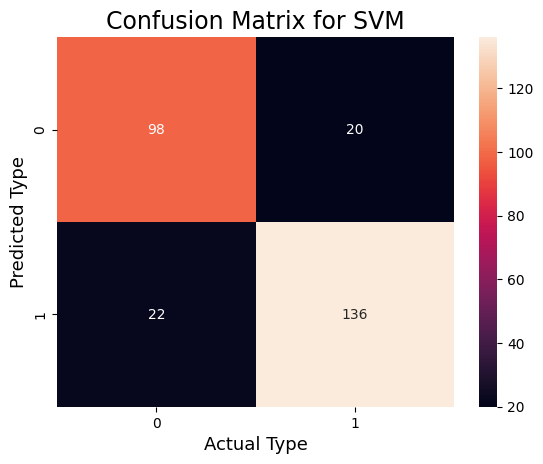

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for SVM',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for SVM :\n", classification_report(y_test, y_pred))

Classification Report for SVM :
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       118
           1       0.87      0.86      0.87       158

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276



#4. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
print("Accuracy for Random Forest:", accuracy_score(y_test, y_pred)*100)
print("Recall of Random Forest: ", recall_score(y_test, y_pred))
print("Precision Score of Random Forest: ", precision_score(y_test, y_pred))
print("F1 Score of Random Forest: ", f1_score(y_test, y_pred))

Accuracy for Random Forest: 86.23188405797102
Recall of Random Forest:  0.8860759493670886
Precision Score of Random Forest:  0.875
F1 Score of Random Forest:  0.8805031446540881


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC AUC Score for Random Forest Classifier: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for Random Forest Classifier:  0.8582922119716798


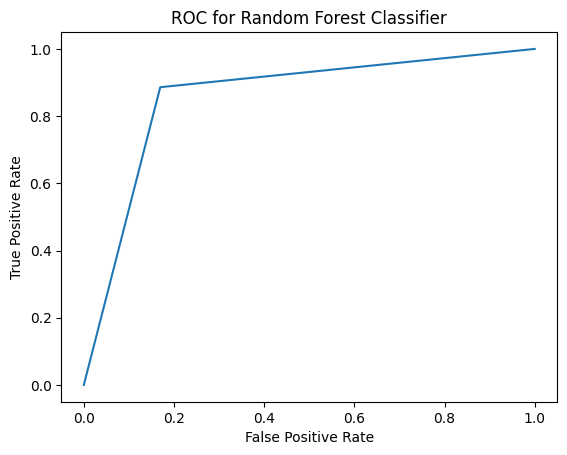

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for Random Forest Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

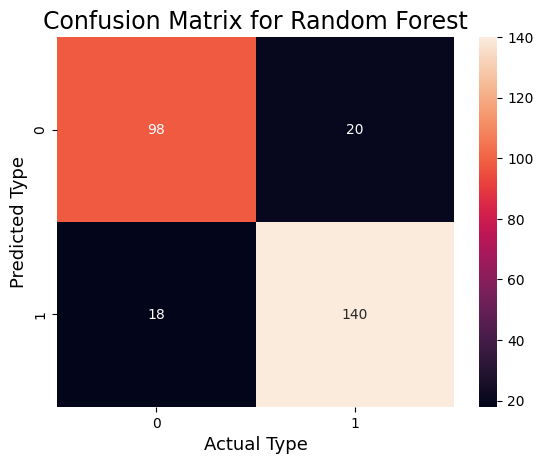

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for Random Forest',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       118
           1       0.88      0.89      0.88       158

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



#5. Logistic Regression: 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(random_state = 0)
lg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print("Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred)*100)
print("Recall of Logistic Regression: ", recall_score(y_test, y_pred))
print("Precision Score of Logistic Regression: ", precision_score(y_test, y_pred))
print("F1 Score of Logistic Regression: ", f1_score(y_test, y_pred))

Accuracy for Logistic Regression: 85.14492753623189
Recall of Logistic Regression:  0.879746835443038
Precision Score of Logistic Regression:  0.8633540372670807
F1 Score of Logistic Regression:  0.8714733542319749


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC AUC Score for Logistic Regression: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for Logistic Regression:  0.8466530787384683


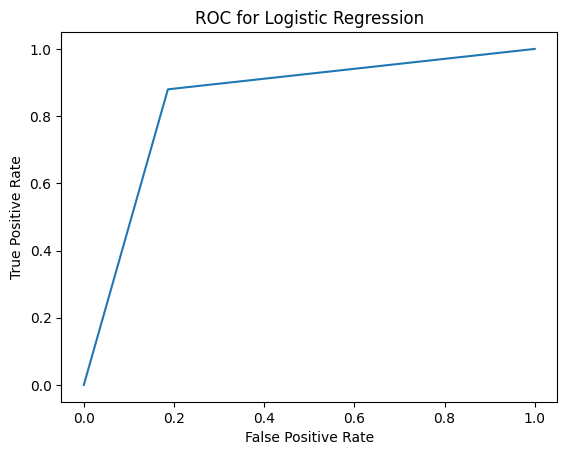

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

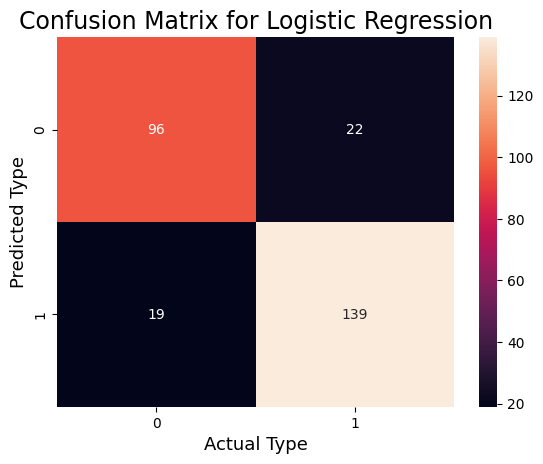

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for Logistic Regression',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.86      0.88      0.87       158

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



#5. Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy for Naive Bayes:", accuracy_score(y_test, y_pred)*100)
print("Recall of Naive Bayes: ", recall_score(y_test, y_pred))
print("Precision Score of Naive Bayes: ", precision_score(y_test, y_pred))
print("F1 Score of Naive Bayes: ", f1_score(y_test, y_pred))

Accuracy for Naive Bayes: 87.31884057971014
Recall of Naive Bayes:  0.8860759493670886
Precision Score of Naive Bayes:  0.89171974522293
F1 Score of Naive Bayes:  0.8888888888888888


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print('ROC AUC Score for Naive Bayes: ', roc_auc_score(y_test, y_pred))

ROC AUC Score for Naive Bayes:  0.8710040763784594


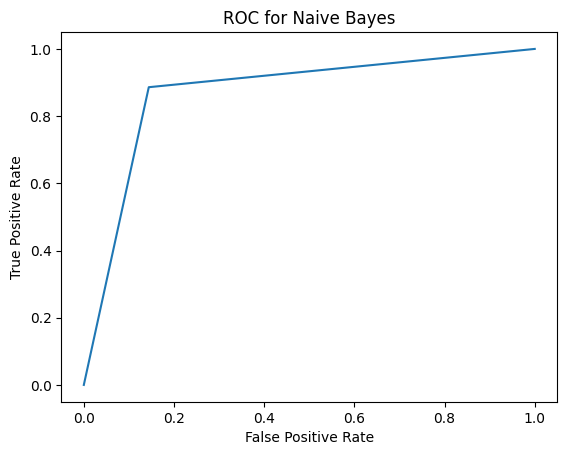

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC for Naive Bayes')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

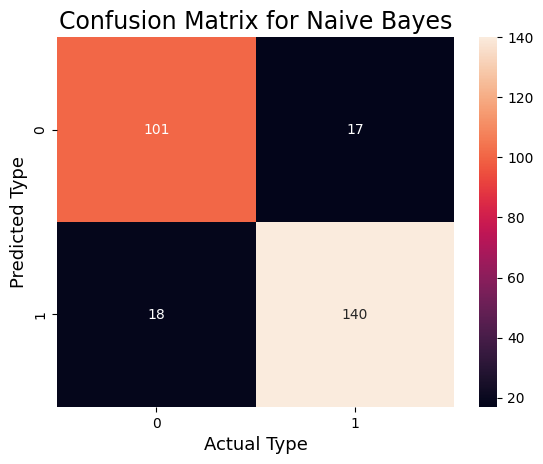

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Predicted Type',fontsize=13)
plt.xlabel('Actual Type',fontsize=13)
plt.title('Confusion Matrix for Naive Bayes',fontsize=17)
plt.show()

In [ ]:
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.89      0.89      0.89       158

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



#Live Prediction:

In [ ]:
ptest = df.iloc[-1:, df.columns != 'HeartDisease']
ptest

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
918,0.0,1,1,0.6,0.273632,0,1,0.246479,0,0.0,2


In [ ]:
def result(res):
  if res == 0:
     print("Dear",name,", You are safe, Have a great day !") 
  else: print("Dear",name,", It's an Emergency !!, You need to be diagnosed.")

In [ ]:
print("Report by KNN: ")
knnres = knn5.predict(ptest)
result(knnres)
print("Report by Decision Tree: ")
dtres = dtree.predict(ptest)
result(dtres)
print("Report by SVM: ")
svmres = svm.predict(ptest)
result(svmres)
print("Report by Random Forest: ")
rfres = rfc.predict(ptest)
result(rfres)
print("Report by Logistic Regression: ")
lgres = lg.predict(ptest)
result(lgres)
print("Report by Naive Bayes: ")
NBres = gnb.predict(ptest)
result(NBres)

Report by KNN: 
Dear Dheeraj , You are safe, Have a great day !
Report by Decision Tree: 
Dear Dheeraj , You are safe, Have a great day !
Report by SVM: 
Dear Dheeraj , You are safe, Have a great day !
Report by Random Forest: 
Dear Dheeraj , You are safe, Have a great day !
Report by Logistic Regression: 
Dear Dheeraj , You are safe, Have a great day !
Report by Naive Bayes: 
Dear Dheeraj , You are safe, Have a great day !


----------------------------------------------------------------------------------------------------


#Excess

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
#print("Confusion matrix: ", confusion_matrix(y_pred, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 87.31884057971014
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.89      0.89      0.89       158

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y5pred))

Confusion matrix: 
[[ 94  24]
 [ 19 139]]


Age and HeartDisease: 


<ipython-input-144-b13dc00d8b43>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


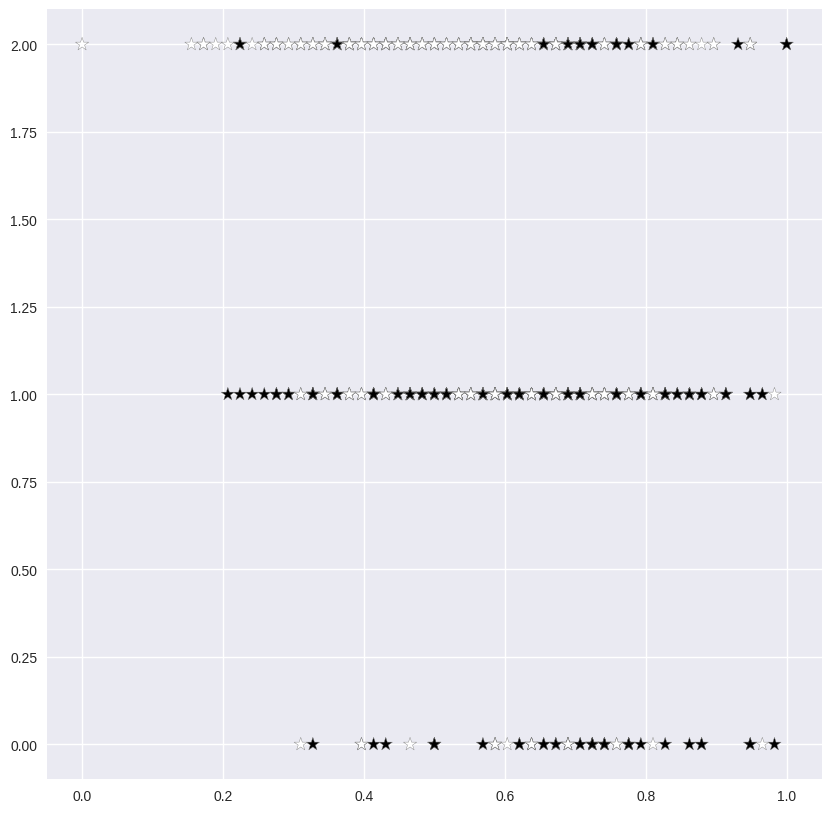

In [ ]:
#Visualising Dataset: 
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(x.iloc[:,0], x.iloc[:,10], c=y, marker= '*',s=100, edgecolors='grey')
print("Age and HeartDisease: ")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 87.31884057971014
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.89      0.89      0.89       158

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



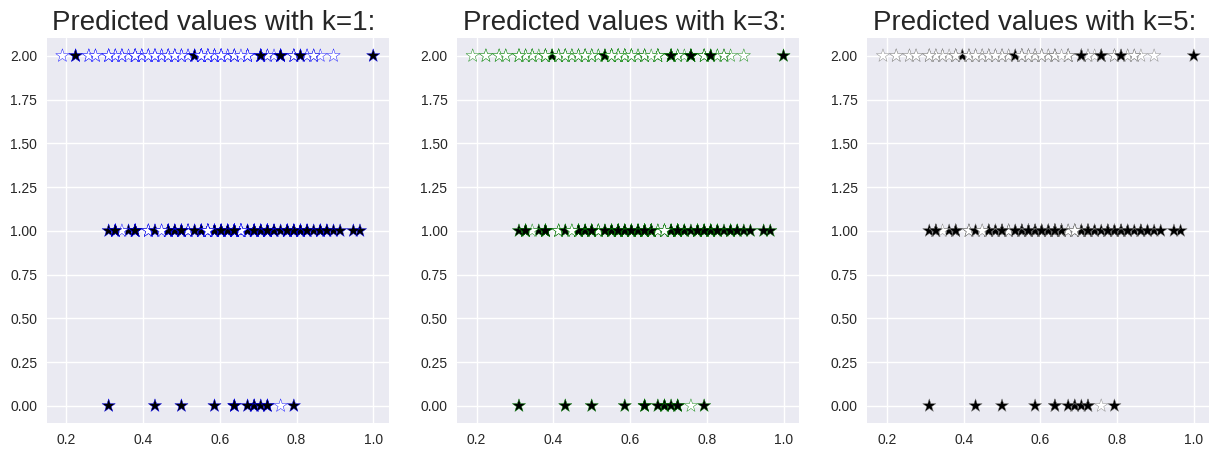

In [ ]:
#Visuslising prediction: 
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(x_test.iloc[:,0], x_test.iloc[:,10], c=y1pred, marker= '*', s=100,edgecolors='blue')
plt.title("Predicted values with k=1: ", fontsize=20)
plt.subplot(1,3,2)
plt.scatter(x_test.iloc[:,0], x_test.iloc[:,10], c=y3pred, marker= '*', s=100,edgecolors='green')
plt.title("Predicted values with k=3: ", fontsize=20)
plt.subplot(1,3,3)
plt.scatter(x_test.iloc[:,0], x_test.iloc[:,10], c=y5pred, marker= '*', s=100,edgecolors='grey')
plt.title("Predicted values with k=5: ", fontsize=20)
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y5pred)*100)
print("Classification Report:\n", classification_report(y_test, y5pred))

Accuracy: 84.42028985507247
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       118
           1       0.85      0.88      0.87       158

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [ ]:

print("Training accuracy: ", svm.score(x_train, y_train)*100)
print("Testing accuracy: ", svm.score(x_test, y_test)*100)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

Training accuracy:  85.8475894245723
Testing accuracy:  84.78260869565217
Accuracy: 87.31884057971014
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.89      0.89      0.89       158

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
y_pred =  kmeans.predict(x_test)

In [ ]:
#https://www.kaggle.com/code/abdallahwagih/heart-attack-analysis-and-prediction-using-ml

ML Model Evaluation:
https://www.jeremyjordan.me/evaluating-a-machine-learning-model/